<h1>PAIRS TRADING BACKTEST</h1>

<h3>1. Run Once </h3>
install necessary packages.
After that, you need comment the above part of code

In [1]:
# import sys
# !{sys.executable} -m pip install -r ./requirements.txt

<h3>2. Imports </h3>
get classes of this system

In [2]:
from research import Researcher
from backtest import Backtester

<h3>3. Settings </h3>
Adjust the settings before run.

In [3]:
is_new_historical_data = False
is_new_backtesting = True
exchange = 'binance'
timeframe = '1d'
interval = '2 years ago'
min_correlation = 0.51

<h3>4. Research Data </h3>
Load previous data or get new data by selecting the desired timeframe, interval and minimum correlation for new data

In [4]:
research = Researcher()

if is_new_historical_data:
    # Get new research data #
    research.new_research(exchange=exchange, timeframe=timeframe, interval=interval, min_correlation=min_correlation)
    research.save_outputs()

else:
    # Load last researched data #
    research.load_research()

research.output_df

,currency1,currency2,correlation,ratio,zero_crossings
7199,ONT/USDT,XEM/USDT,0.773170,5.411102,78
997,AR/USDT,IOTA/USDT,0.586446,43.103630,75
650,ALPHA/USDT,CELR/USDT,0.662115,7.709876,74
365,ADA/USDT,ZRX/USDT,0.688869,1.658436,73
6906,NEO/USDT,OXT/USDT,0.637737,86.642260,70
...,...,...,...,...,...
6496,LPT/USDT,YFI/USDT,0.538591,0.001148,40
2388,BLZ/USDT,CTK/USDT,0.541928,0.124799,40
4193,DENT/USDT,SOL/USDT,0.680137,0.000027,40
7687,SKL/USDT,TRU/USDT,0.585554,0.675007,40


<h3>5. Backtest Data </h3>
Load previous backtest or get new backtesting by given research data to it

In [5]:
backtest = Backtester(research)

if is_new_backtesting:
    # # Do a new backtesting with researched data #
    backtest.edit_settings(open_at=2, close_at=0)
    backtest.run_backtests()
    backtest.save_outputs()

else:
    backtest.load_backtests()

backtest.results_df

,n_trades,sharperatio,max_drawdown,roi,currency1,currency2,ratio,correlation
0,42,6.255853,7.54,469.33,C98/USDT,TRU/USDT,6.965993,0.559439
0,48,5.884815,8.64,254.25,ONT/USDT,XEM/USDT,5.411102,0.773170
0,48,5.884815,8.64,254.25,ONT/USDT,XEM/USDT,5.411102,0.773170
0,48,5.740634,7.98,278.12,1INCH/USDT,LINA/USDT,68.792549,0.584358
0,39,5.687684,12.86,275.31,1INCH/USDT,TRU/USDT,7.661833,0.575529
...,...,...,...,...,...,...,...,...
0,31,-0.015134,163.95,-35.00,ALPHA/USDT,LRC/USDT,0.388729,0.575342
0,36,-0.053185,122.98,-48.28,ALGO/USDT,LRC/USDT,0.796438,0.568205
0,36,-0.077341,207.21,-64.53,LRC/USDT,XTZ/USDT,0.261754,0.526688
0,26,-0.080046,65.25,-9.41,RSR/USDT,SOL/USDT,0.000182,0.614564


<h3>6. Selecting Pairs </h3>
It removes pairs with low sharpe ratio and high draw down, and also removes same currency appearing.

In [6]:
# Removes unwanted pairs
df = backtest.results_df
df_filtered = df[(df['sharperatio'] >= 4) & (df['max_drawdown'] <= 20)]
# df_filtered = df[(df['max_drawdown'] <= 30) & (df['roi'] >= 300) & (df['sharperatio'] >= 3)]
df_unique =  df_filtered.drop_duplicates(subset='currency1', keep='first', inplace=False).drop_duplicates(subset='currency2', keep='first', inplace=False)

# In case of same currency apparition, it removes the weaker pair #
weaker_pairs = df_unique.apply(lambda x: df_unique.loc[df_unique['currency2'] == x['currency1'], 'roi'].max() >= x['roi'] or
                                         df_unique.loc[df_unique['currency1'] == x['currency2'], 'roi'].max() >= x['roi'], axis=1)
df_final = df_unique[~weaker_pairs]
df_final

,n_trades,sharperatio,max_drawdown,roi,currency1,currency2,ratio,correlation
0,42,6.255853,7.54,469.33,C98/USDT,TRU/USDT,6.965993,0.559439
0,48,5.884815,8.64,254.25,ONT/USDT,XEM/USDT,5.411102,0.773170
0,48,5.740634,7.98,278.12,1INCH/USDT,LINA/USDT,68.792549,0.584358
0,42,5.028127,15.00,245.64,OXT/USDT,SC/USDT,24.099417,0.634955
0,38,4.957562,11.89,250.28,TOMO/USDT,ZEN/USDT,0.030205,0.677169
0,38,4.867586,14.81,362.16,DOT/USDT,UMA/USDT,2.976755,0.601379
0,36,4.342297,12.18,241.35,DGB/USDT,NKN/USDT,0.103733,0.639106
0,41,4.229836,16.38,239.47,AXS/USDT,GRT/USDT,138.711720,0.646652
0,31,4.160927,11.56,269.01,CKB/USDT,STX/USDT,0.010191,0.533567
0,37,4.105517,10.22,263.39,FIL/USDT,REN/USDT,61.259971,0.586242


<h3>7. Exporting Results to BOT </h3>

In [7]:
df_exports = df_final[['currency1', 'currency2', 'ratio']].copy()
df_exports['timeframe'] = timeframe
df_exports.reset_index(inplace=True, drop=True)
df_exports.to_csv('./data/outputs/bot_input.csv', index=False)
df_exports

,currency1,currency2,ratio,timeframe
0,C98/USDT,TRU/USDT,6.965993,1d
1,ONT/USDT,XEM/USDT,5.411102,1d
2,1INCH/USDT,LINA/USDT,68.792549,1d
3,OXT/USDT,SC/USDT,24.099417,1d
4,TOMO/USDT,ZEN/USDT,0.030205,1d
5,DOT/USDT,UMA/USDT,2.976755,1d
6,DGB/USDT,NKN/USDT,0.103733,1d
7,AXS/USDT,GRT/USDT,138.711720,1d
8,CKB/USDT,STX/USDT,0.010191,1d
9,FIL/USDT,REN/USDT,61.259971,1d


<h3>8. Visualizing Results </h3>
Of the remaining pairs on list

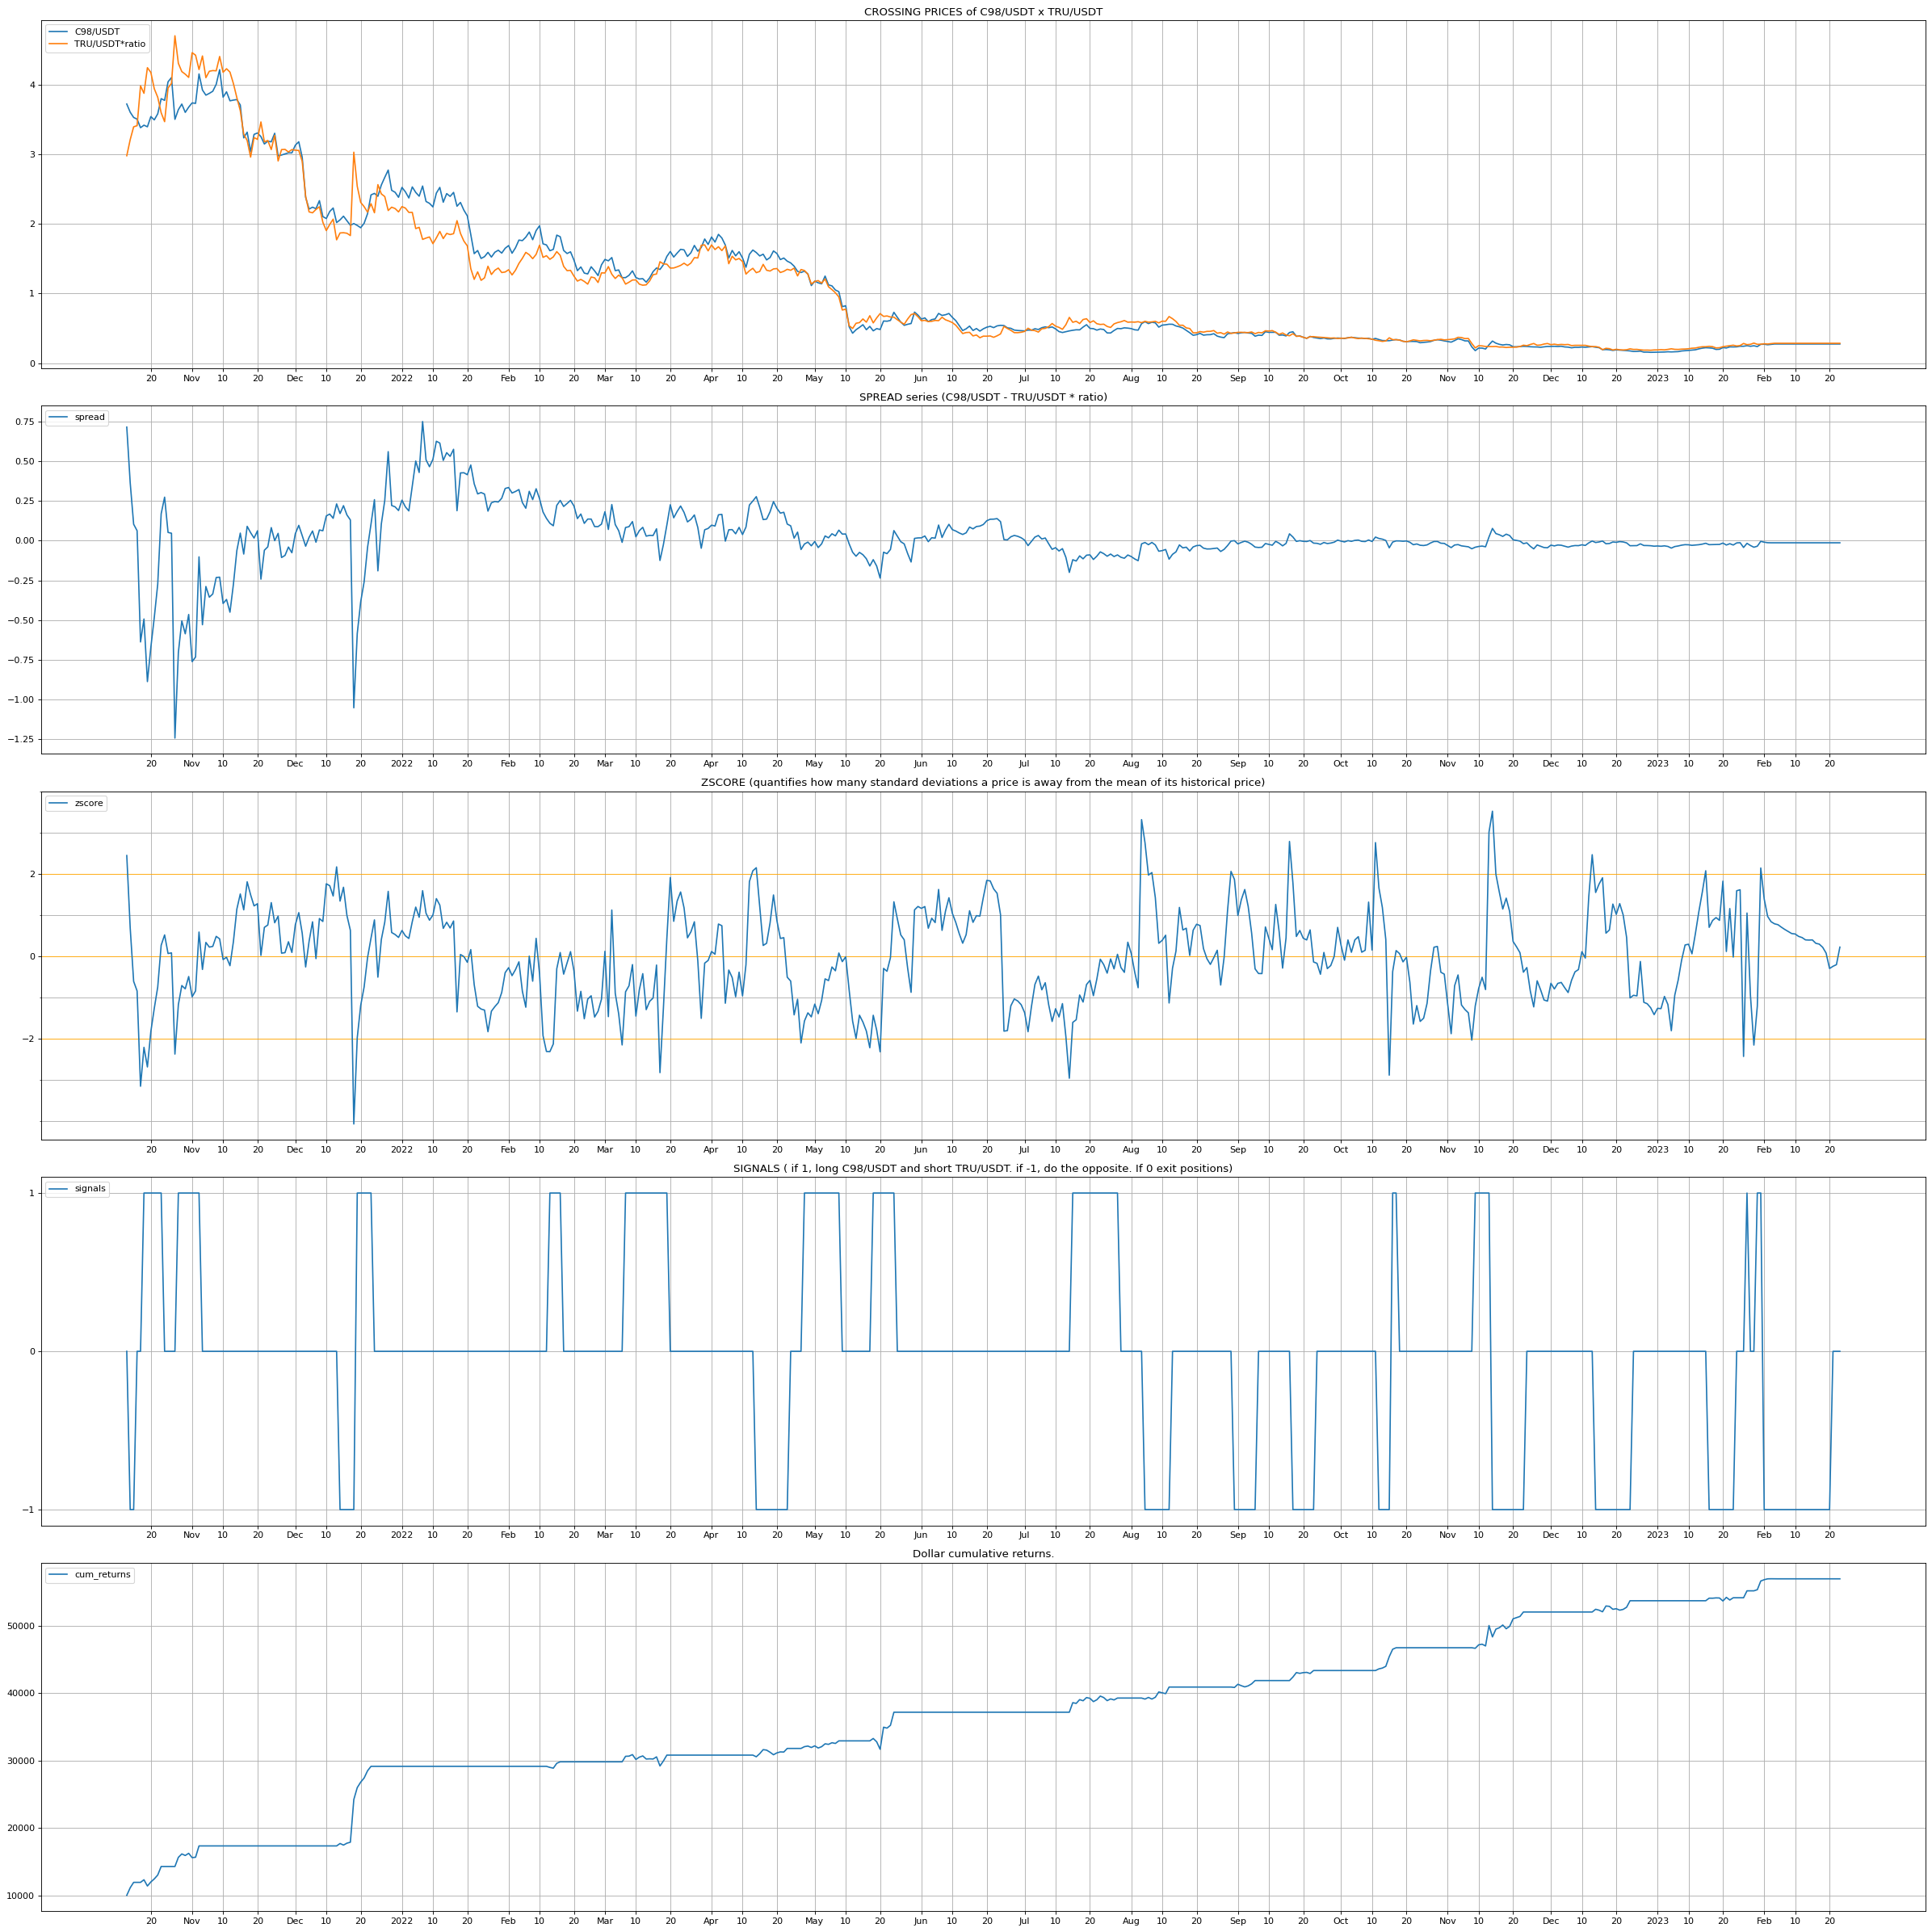

,C98/USDT,TRU/USDT,spread,zscore,signals,log_returns1,log_returns2,log_returns_total,simple_returns,dollar_returns,cum_returns
time,,,,,,,,,,,
2021-10-13,3.7210,0.4315,0.715174,2.443062,0.0,0.000000,-0.000000,0.000000,0.000000,0.000000,10000.000000
2021-10-14,3.6030,0.4650,0.363813,0.680045,-1.0,0.032226,0.074770,0.106996,0.112929,1129.292604,11129.292604
2021-10-15,3.5280,0.4916,0.103518,-0.614245,-1.0,0.021036,0.055628,0.076664,0.079679,796.788823,11926.081427
2021-10-16,3.5040,0.4940,0.062799,-0.846471,0.0,-0.000000,-0.000000,-0.000000,0.000000,0.000000,11926.081427
2021-10-17,3.3810,0.5769,-0.637682,-3.162453,0.0,-0.000000,-0.000000,-0.000000,0.000000,0.000000,11926.081427
...,...,...,...,...,...,...,...,...,...,...,...
2023-02-19,0.2758,0.0415,-0.013289,0.071726,-1.0,-0.000000,0.000000,0.000000,0.000000,0.000000,56933.238231
2023-02-20,0.2758,0.0415,-0.013289,-0.301806,-1.0,-0.000000,0.000000,0.000000,0.000000,0.000000,56933.238231
2023-02-21,0.2758,0.0415,-0.013289,-0.247555,0.0,0.000000,-0.000000,0.000000,0.000000,0.000000,56933.238231


In [8]:
output_df = backtest.plot('C98/USDT', 'TRU/USDT')
output_df